# Crash Course in Statistics

This Jupyter notebook is designed to provide a crash course in key statistical concepts. 

Each section covers fundamental topics and includes Python code examples to illustrate the concepts.

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# Suppress the deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)

np.random.seed(42)

## 1. Descriptive Statistics

Descriptive statistics summarize and organize characteristics of a data set.

### Mean

The **mean** is the average of all data points.

In [2]:
data = [12, 15, 14, 10, 13, 15, 16, 14, 14, 13]
mean_value = np.mean(data)
print(f"Mean: {mean_value}")

Mean: 13.6


### Median

The **median** is the middle value when data points are ordered.

In [3]:
median_value = np.median(data)
print(f"Median: {median_value}")

Median: 14.0


### Variance

**Variance** measures the dispersion of data points.

In [4]:
variance_value = np.var(data, ddof=1)  # ddof=1 for sample variance
print(f"Variance: {variance_value}")

Variance: 2.933333333333333


### Standard Deviation

**Standard deviation** is the square root of variance.

In [5]:
std_dev = np.std(data, ddof=1)
print(f"Standard Deviation: {std_dev}")

Standard Deviation: 1.7126976771553504


### Quartiles

**Quartiles** divide data into four equal parts.

In [6]:
data = [12, 15, 14, 10, 13, 15, 16, 14, 14, 13]
quartiles = np.percentile(data, [25, 50, 75])
print(f"Data: {sorted(data)}")
print(f"Quartiles: {quartiles}")

Data: [10, 12, 13, 13, 14, 14, 14, 15, 15, 16]
Quartiles: [13.   14.   14.75]


## 2. Probability Distributions

Probability distributions describe how probabilities are distributed over the values of a random variable.

### Normal Distribution

The **normal distribution** is a continuous probability distribution characterized by a symmetric bell-shaped curve.

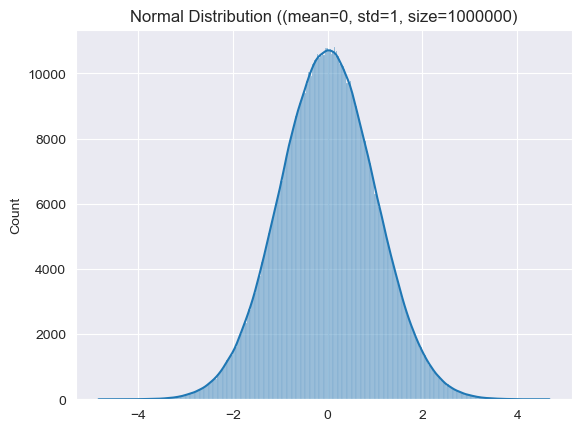

In [7]:
# Generate normal distribution data
mu, sigma = 0, 1  # mean and standard deviation
size = int(1e6)  # Number of samples to draw per trial
s = np.random.normal(mu, sigma, size)

# Plot
sns.histplot(s, kde=True)
plt.title(f'Normal Distribution ((mean={mu}, std={sigma}, size={size})')
plt.show()

### Bernoulli Distribution

The **Bernoulli distribution** models a binary outcome (success/failure).

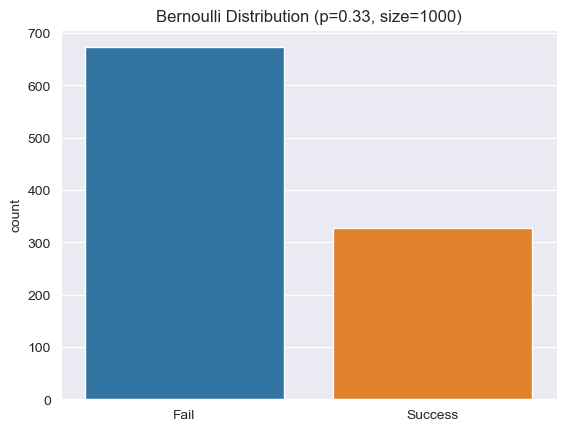

In [8]:
# Generate Bernoulli distribution data
n = 1  # Number of trials
size = 1000  # Number of samples to draw per trial
p = 0.33  # Probability of success per sample drawn
bern_data = np.random.binomial(n, p, size)

# Plot
sns.countplot(x=bern_data)
plt.title(f'Bernoulli Distribution (p={p}, size={size})')
plt.xticks([0, 1], ['Fail', 'Success'])
plt.show()

### Binomial Distribution

The **binomial distribution** models the number of successes in a fixed number of independent Bernoulli trials.

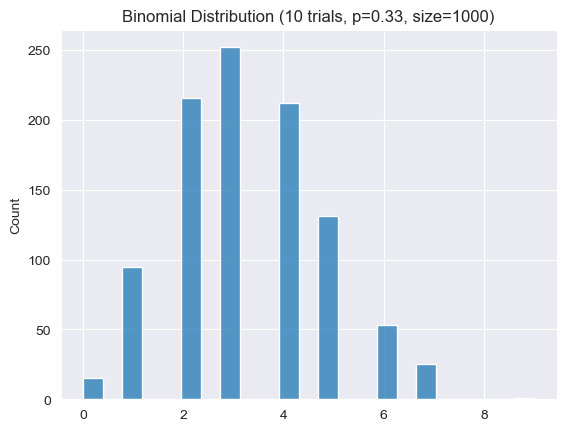

In [9]:
# Generate binomial distribution data
n = 10  # 10 independent Bernoulli trials
binom_data = np.random.binomial(n, p, size)

# Plot
sns.histplot(binom_data, kde=False)
plt.title(f'Binomial Distribution ({n} trials, p={p}, size={size})')
plt.show()

### Poisson Distribution

The **Poisson distribution** models the number of times an event occurs in a fixed interval.

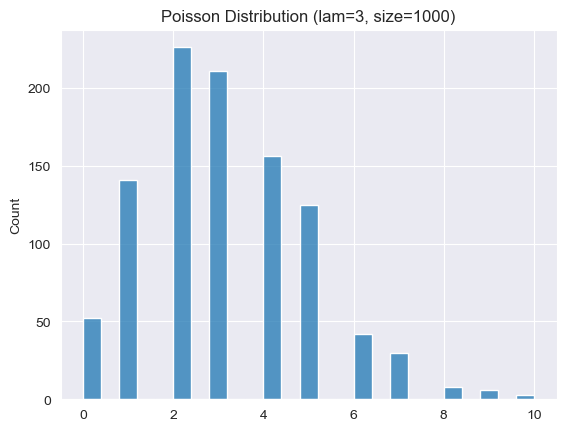

In [10]:
# Generate Poisson distribution data
lam = 3  # rate parameter
poisson_data = np.random.poisson(lam, size)

# Plot
sns.histplot(poisson_data, kde=False)
plt.title(f'Poisson Distribution (lam={lam}, size={size})')
plt.show()

## 3. Hypothesis Testing

Hypothesis testing is a statistical method that uses sample data to evaluate a hypothesis about a population parameter.

### Understanding p-values

A **p-value** indicates the probability of obtaining test results at least as extreme as the observed results, assuming the null hypothesis is true.

### t-tests

A **t-test** compares the means of two groups.

In [11]:
# Sample data
group1 = np.random.normal(10, 2, size)
group2 = np.random.normal(10, 2, size)

# Perform t-test
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: -0.08357635417460112, p-value: 0.9334016401226172


### z-tests

A **z-test** is used when the population variance is known and the sample size is large.

In [12]:
# Sample data
sample_mean = 105
population_mean = 100
population_std = 15
n = 50

# Calculate z-statistic
z_stat = (sample_mean - population_mean) / (population_std / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
print(f"z-statistic: {z_stat}, p-value: {p_value}")

z-statistic: 2.3570226039551585, p-value: 0.018422125454099048


### Confidence Intervals

A **confidence interval** provides a range of values within which the true population parameter is expected to lie.

In [13]:
# Sample data
data = np.random.normal(100, 15, 50)
mean = np.mean(data)
sem = stats.sem(data)
confidence = 0.95

# Calculate confidence interval
h = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
lower_bound = mean - h
upper_bound = mean + h
print(f"{confidence * 100}% confidence interval: ({lower_bound}, {upper_bound})")

95.0% confidence interval: (98.22634175972424, 106.55897742392678)


## 4. Linear Regression Basics

Linear regression models the relationship between a dependent variable and one or more independent variables.

### Correlation

**Correlation** measures the strength and direction of a linear relationship between two variables.

In [14]:
# Sample data
x = np.random.rand(size)
y = 2 * x + np.random.normal(0, 0.1, size)

# Calculate correlation coefficient
corr_coef = np.corrcoef(x, y)[0, 1]
print(f"Correlation coefficient: {corr_coef}")

Correlation coefficient: 0.9857155354935038


### Least Squares

The **least squares** method minimizes the sum of the squares of the residuals.

In [15]:
# Reshape data
X = x.reshape(-1, 1)
Y = y.reshape(-1, 1)

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Coefficients
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Slope: {slope}, Intercept: {intercept}")

Slope: 1.9892832293169733, Intercept: 0.007807061187259268


### Interpreting Model Results

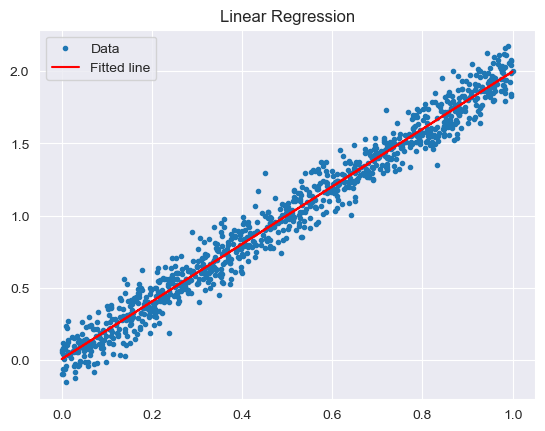

In [16]:
# Predicted values
y_pred = model.predict(X)

# Plot
plt.scatter(X, Y, label='Data', marker='.')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.legend()
plt.title('Linear Regression')
plt.show()

## 5. A/B Testing and Related Metrics

A/B testing compares two versions (A and B) to determine which one performs better.

### Significance Testing

In [17]:
from statsmodels.stats.proportion import proportions_ztest

# Sample data
success_a = 50
n_a = 200
success_b = 70
n_b = 200

# Perform z-test for proportions
count = np.array([success_a, success_b])
nobs = np.array([n_a, n_b])
stat, pval = proportions_ztest(count, nobs)
print(f"Z-statistic: {stat}, p-value: {pval}")

Z-statistic: -2.182178902359923, p-value: 0.029096331741252264


### Confidence Intervals

In [18]:
# Calculate confidence intervals for proportions
from statsmodels.stats.proportion import proportion_confint

confint_a = proportion_confint(success_a, n_a, alpha=0.05)
confint_b = proportion_confint(success_b, n_b, alpha=0.05)
print(f"95% CI for group A: {confint_a}")
print(f"95% CI for group B: {confint_b}")

95% CI for group A: (0.18998860404555862, 0.3100113959544414)
95% CI for group B: (0.28389660062795885, 0.4161033993720411)
